# Merge des DF Incidents et Mobilisations


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
# charge du dataFrame Mobilisation

dico = {'IncidentNumber' : 'str',
       'DelayCodeId' : 'object'}

Mobilisation =pd.read_csv("Data/Mobilisation_2009_2023.csv", dtype=dico)


C:\Users\loreb\AppData\Local\Temp\ipykernel_2488\1726251921.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  Mobilisation =pd.read_csv("Data/Mobilisation_2009_2023.csv", dtype=dico)


In [42]:
pd.set_option('max_colwidth',50)
pd.set_option('display.max_columns',50)
Mobilisation.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TempsDepartSeconds,TravelTimeSeconds,TempsTrajetSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,Division_station
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:00,NaN,2009-01-01 00:07:00,NaN,NaN,NaN,NaN,319,2009-01-01 00:16:00,2009-01-01 00:23:00,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,H
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:00,2009-01-01 00:06:00,2009-01-01 00:08:00,253.0,240.0,89.0,120.0,342,2009-01-01 00:12:00,2009-01-01 00:12:00,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,H
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:09:00,151.0,120.0,157.0,180.0,308,2009-01-01 00:16:00,2009-01-01 00:17:00,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,A
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:08:00,108.0,120.0,102.0,120.0,210,2009-01-01 00:20:00,2009-01-01 00:20:00,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,G
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,114.0,60.0,119.0,120.0,233,2009-01-01 00:11:00,2009-01-01 00:22:00,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,A


In [9]:
Mobilisation.DeployedFromLocation.value_counts()

DeployedFromLocation
Home Station     2200894
Other Station      75504
Name: count, dtype: int64

In [5]:
Mobilisation = Mobilisation.drop(["TempsDepartSeconds","TempsTrajetSeconds"], axis = 1)


In [11]:
Mobilisation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277517 entries, 0 to 2277516
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   IncidentNumber            object 
 1   CalYear                   object 
 2   HourOfCall                int64  
 3   ResourceMobilisationId    object 
 4   Resource_Code             object 
 5   PerformanceReporting      object 
 6   DateAndTimeMobilised      object 
 7   DateAndTimeMobile         object 
 8   DateAndTimeArrived        object 
 9   TurnoutTimeSeconds        float64
 10  TravelTimeSeconds         float64
 11  AttendanceTimeSeconds     int64  
 12  DateAndTimeLeft           object 
 13  DateAndTimeReturned       object 
 14  DeployedFromStation_Code  object 
 15  DeployedFromStation_Name  object 
 16  DeployedFromLocation      object 
 17  PumpOrder                 int64  
 18  PlusCode_Code             object 
 19  PlusCode_Description      object 
 20  DelayCodeId             

 Le dataframe Mobilisation contient une ligne pour chaque camions intervenant. Donc on a des numéros d'incidents qui se répètent. Pose problème pour le merge avec le df Incident.  
 Donc regroupement des infos sur les performances des 1er et 2nd camions arrivés sur une seule ligne     
 Pour les 1er et 2nd camions : retenir certaines variables : Turnout time, travel time , cause de retard, la district de la station 


In [6]:
# Création de deux dataFrame qui renvoient les performances en fonction de l'ordre d'arrivé des camions
# Pour les premier et second camion arrivés on indique: le n°d'incident,le temps de mise en route,le temps de trajet
# le temps de réponse, la station de déployement, la raison de retard


# Premiere pompe arrivée
premier_camion = Mobilisation[Mobilisation["PumpOrder"]==1][["IncidentNumber","TurnoutTimeSeconds","TravelTimeSeconds","AttendanceTimeSeconds",
                                                                            "DelayCode_Description","Division_station"]]

# Seconde pompe arrivée
second_camion = Mobilisation[Mobilisation["PumpOrder"]==2][["IncidentNumber","TurnoutTimeSeconds","TravelTimeSeconds","AttendanceTimeSeconds",
                                                                            "DelayCode_Description","Division_station"]]


display(second_camion.head())
display(premier_camion.head())

,IncidentNumber,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DelayCode_Description,Division_station
1,235138081,253.0,89.0,342,NaN,H
5,5091,142.0,108.0,250,NaN,A
7,6091,95.0,127.0,222,NaN,A
10,9091,183.0,166.0,349,NaN,G
21,23091,173.0,224.0,397,NaN,A


,IncidentNumber,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DelayCode_Description,Division_station
0,235138081,NaN,NaN,319,NaN,H
2,2091,151.0,157.0,308,NaN,A
3,3091,108.0,102.0,210,NaN,G
4,5091,114.0,119.0,233,NaN,A
6,6091,83.0,89.0,172,NaN,A


In [7]:
# renomme les colonnes en conséquence

premier_camion.rename({"TurnoutTimeSeconds" : "FirstPumpArriving_TurnoutTimeSec",
                      "TravelTimeSeconds" : "FirstPumpArriving_TravelTimeSec",
                       "AttendanceTimeSeconds" : "Mob_FirstPump_AttendanceTime",
                     "DelayCode_Description" : "FirstPump_DelayCode_Description",
                      "Division_station" : "FirstPump_Division_staion"},axis = 1, inplace = True)


second_camion.rename({"TurnoutTimeSeconds" : "SecondPumpArriving_TurnoutTimeSec",
                      "TravelTimeSeconds" : "SecondPumpArriving_TravelTimeSec",
                      "AttendanceTimeSeconds" : "Mob_SecondPump_AttendanceTime",
                     "DelayCode_Description" : "SecondPump_DelayCode_Description",
                     "Division_station" : 'SecondPump_Division_staion'},axis = 1, inplace = True)

display(premier_camion.head())
display(second_camion.head())

,IncidentNumber,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion
0,235138081,NaN,NaN,319,NaN,H
2,2091,151.0,157.0,308,NaN,A
3,3091,108.0,102.0,210,NaN,G
4,5091,114.0,119.0,233,NaN,A
6,6091,83.0,89.0,172,NaN,A


,IncidentNumber,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion
1,235138081,253.0,89.0,342,NaN,H
5,5091,142.0,108.0,250,NaN,A
7,6091,95.0,127.0,222,NaN,A
10,9091,183.0,166.0,349,NaN,G
21,23091,173.0,224.0,397,NaN,A


In [8]:
## Merge des data des premiers et seconds camions en fonction de l'incident ID
# outer pour mettre des Nan quand on a pas de valeurs (nottamment si pas de 2eme pompe arrivant)

Mob_pompes_12 = premier_camion.merge(second_camion, on = "IncidentNumber", how = "outer")

Mob_pompes_12.head(20)


,IncidentNumber,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion
0,235138081,NaN,NaN,319,NaN,H,253.0,89.0,342.0,NaN,H
1,2091,151.0,157.0,308,NaN,A,NaN,NaN,NaN,NaN,NaN
2,3091,108.0,102.0,210,NaN,G,NaN,NaN,NaN,NaN,NaN
3,5091,114.0,119.0,233,NaN,A,142.0,108.0,250.0,NaN,A
4,6091,83.0,89.0,172,NaN,A,95.0,127.0,222.0,NaN,A
5,8091,119.0,403.0,522,Not held up,E,NaN,NaN,NaN,NaN,NaN
6,9091,178.0,164.0,342,NaN,G,183.0,166.0,349.0,NaN,G
7,10091,121.0,134.0,255,NaN,A,NaN,NaN,NaN,NaN,NaN
8,11091,110.0,187.0,297,NaN,A,NaN,NaN,NaN,NaN,NaN
9,14091,NaN,NaN,256,NaN,E,NaN,NaN,NaN,NaN,NaN


In [14]:
Mob_pompes_12.isna().sum()


IncidentNumber                             0
FirstPumpArriving_TurnoutTimeSec       21290
FirstPumpArriving_TravelTimeSec        21371
Mob_FirstPump_AttendanceTime               0
FirstPump_DelayCode_Description      1075592
FirstPump_Division_staion                 15
SecondPumpArriving_TurnoutTimeSec     932493
SecondPumpArriving_TravelTimeSec      932497
Mob_SecondPump_AttendanceTime         927332
SecondPump_DelayCode_Description     1387686
SecondPump_Division_staion            927339
dtype: int64

In [33]:
# Charge du dataframe Incidents contenant les deux dataframes

dico = {"IncidentNumber" : 'str'}

Incidents = pd.read_csv("Data/Incidents_2009_2024.csv", low_memory = False, dtype = dico)


In [38]:
Incidents.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081,2009-01-01,2009,1900-01-01 00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091,2009-01-01,2009,1900-01-01 00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091,2009-01-01,2009,1900-01-01 00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091,2009-01-01,2009,1900-01-01 00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091,2009-01-01,2009,1900-01-01 00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


In [17]:
Incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647890 entries, 0 to 1647889
Data columns (total 39 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1647890 non-null  object 
 1   DateOfCall                              1647890 non-null  object 
 2   CalYear                                 1647890 non-null  object 
 3   TimeOfCall                              1647890 non-null  object 
 4   HourOfCall                              1647890 non-null  object 
 5   IncidentGroup                           1647890 non-null  object 
 6   StopCodeDescription                     1647890 non-null  object 
 7   SpecialServiceType                      527063 non-null   object 
 8   PropertyCategory                        1647890 non-null  object 
 9   PropertyType                            1647890 non-null  object 
 10  AddressQualifier              

In [16]:
Incidents.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1120827
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              810749
Postcode_district                               0
UPRN                                       141333
USRN                                       162871
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               182
IncGeo_WardName                               182


### Merge des dataFrame Incidents et Mobilisation

In [19]:
# numéro d'incident finissant avec '.0' ou '.00' alors ce n'est pas le cas dans le df Mobilisations
print(Incidents.IncidentNumber.iloc[753667])
print(Incidents.IncidentNumber.iloc[10])

128774151.00
12091.0


In [22]:
# sépare la chaine de charactere en focntion du '.' et conserve le 1er element
test = Incidents['IncidentNumber'].astype(str).apply(lambda x :x.split(".")[0])

In [1]:
print(Incidents.IncidentNumber.iloc[753667])
print(test.iloc[753667])

# enleve trop de 0
"120774150.00".rstrip(".0")

NameError: name 'Incidents' is not defined

In [24]:
# pas bon
"128774150.00".rstrip(".0")


'12877415'

In [25]:
"128774150.00".rsplit(".")[0]

'128774150'

In [122]:
print(Incidents_new.IncidentNumber.iloc[10])
print(test.iloc[10])
print(Incidents_new.IncidentNumber.iloc[753667])
print(test.iloc[753667])


12091
12091
128774151
128774151


In [34]:
# Transfo de Incident number en str pour pouvoir merge correctement

#pas bonne méthode car en tout les 0 qui sont en fin de chaine de caractère
#Incidents_new['IncidentNumber'] = Incidents_new['IncidentNumber'].astype(str).apply(lambda x : x.rstrip('.0'))

# split en fonction de '.' et on conserve la premiere partie
Incidents['IncidentNumber'] = Incidents['IncidentNumber'].astype(str).apply(lambda x :x.split(".")[0])

Mob_pompes_12["IncidentNumber"] = Mob_pompes_12["IncidentNumber"].astype(str)


In [35]:
Incidents.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081,2009-01-01,2009,1900-01-01 00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091,2009-01-01,2009,1900-01-01 00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091,2009-01-01,2009,1900-01-01 00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091,2009-01-01,2009,1900-01-01 00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091,2009-01-01,2009,1900-01-01 00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


In [36]:
## Merge des dataframe incident et mobilisation sur incidentNumber
# On ne garde que les Incidents communs au deux

Incidents_Mob = pd.merge(Incidents,Mob_pompes_12, on = "IncidentNumber", how = 'inner')


In [37]:
display(Incidents_Mob.head())
display(Incidents_Mob.tail())


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion
0,235138081,2009-01-01,2009,1900-01-01 00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,NaN,NaN,319,NaN,H,253.0,89.0,342.0,NaN,H
1,2091,2009-01-01,2009,1900-01-01 00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0,151.0,157.0,308,NaN,A,NaN,NaN,NaN,NaN,NaN
2,3091,2009-01-01,2009,1900-01-01 00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0,108.0,102.0,210,NaN,G,NaN,NaN,NaN,NaN,NaN
3,5091,2009-01-01,2009,1900-01-01 00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0,114.0,119.0,233,NaN,A,142.0,108.0,250.0,NaN,A
4,6091,2009-01-01,2009,1900-01-01 00:06:03,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW5,0.000000e+00,20499122.0,E09000007,CAMDEN,Camden,E05013663,Kentish Town North,Kentish Town North,NaN,NaN,529450,185250,NaN,NaN,London,Kentish Town,172.0,Kentish Town,222.0,Kentish Town,1.0,2.0,2,60,255,1.0,83.0,89.0,172,NaN,A,95.0,127.0,222.0,NaN,A


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion
1507494,170388-31102023,2023-10-31,2023,1900-01-01 23:38:47,23,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SE22,0.0,22502036.0,E09000028,SOUTHWARK,Southwark,E05011097,CHAMPION HILL,Champion Hill,NaN,NaN,533450,175450,NaN,NaN,London,Peckham,416.0,Peckham,NaN,NaN,1.0,1.0,1,60,388,1.0,82.0,334.0,416,Traffic calming measures,E,NaN,NaN,NaN,NaN,NaN
1507495,170390-31102023,2023-10-31,2023,1900-01-01 23:43:52,23,Special Service,Special Service,No action (not false alarm),Dwelling,House - single occupancy,Correct incident location,NaN,SE22,0.0,22500641.0,E09000028,SOUTHWARK,Southwark,E05011099,DULWICH HILL,Dulwich Hill,NaN,NaN,534450,174250,NaN,NaN,London,Forest Hill,381.0,New Cross,NaN,NaN,1.0,1.0,1,60,388,1.0,38.0,343.0,381,Not held up,E,NaN,NaN,NaN,NaN,NaN
1507496,170391-31102023,2023-10-31,2023,1900-01-01 23:51:33,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,HA6,0.0,21402187.0,E09000017,HILLINGDON,Hillingdon,E05013575,NORTHWOOD HILLS,Northwood Hills,NaN,NaN,510150,190450,NaN,NaN,London,Ruislip,395.0,Harrow,484.0,Ruislip,2.0,2.0,2,70,453,1.0,96.0,299.0,395,Not held up,G,85.0,399.0,484.0,Not held up,G
1507497,170393-31102023,2023-10-31,2023,1900-01-01 23:53:01,23,False Alarm,AFA,NaN,Non Residential,Purpose built office,Correct incident location,N1C 4AG,N1C,5189364.0,20499403.0,E09000007,CAMDEN,Camden,E05013666,KING'S CROSS,King'S Cross,530108.0,183195.0,530150,183150,51.532685,-0.125583,London,Euston,519.0,Islington,NaN,NaN,1.0,1.0,1,60,388,1.0,426.0,93.0,519,Not held up,A,NaN,NaN,NaN,NaN,NaN
1507498,170394-31102023,2023-10-31,2023,1900-01-01 23:55:18,23,False Alarm,False alarm - Good intent,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,NaN,W12,0.0,21000835.0,E09000013,HAMMERSMITH AND FULHAM,Hammersmith And fulham,E05013750,WENDELL PARK,Wendell Park,NaN,NaN,521850,180050,NaN,NaN,London,Acton,291.0,Acton,291.0,Hammersmith,2.0,2.0,2,60,388,1.0,85.0,206.0,291,NaN,G,82.0,209.0,291.0,NaN,G


In [43]:
# temps de réponse 1er pompe en fonction de la cause retard
Incidents_Mob.groupby("FirstPump_DelayCode_Description")["FirstPumpArriving_AttendanceTime"].agg(["mean","var","min","max",'count'])


,mean,var,min,max,count
FirstPump_DelayCode_Description,,,,,
Address incomplete/wrong,563.614348,36405.276470,360.0,1200.0,27823
Appliance/Equipment defect,496.514851,23852.179653,360.0,1200.0,2222
Arrived but held up - Other reason,525.840202,25583.490549,360.0,1200.0,14268
At drills when mobilised,474.130824,14013.875302,360.0,1192.0,2232
Mob/Radio problems when mobilised,491.485985,23158.267725,360.0,1197.0,7492
Not held up,470.482964,14541.438822,168.0,1200.0,254497
On outside duty when mobilised,497.187235,17273.042221,360.0,1192.0,7066
Traffic calming measures,466.349038,13296.842518,292.0,1200.0,27126
"Traffic, roadworks, etc",479.568157,15798.164242,360.0,1200.0,84547


In [42]:
Incidents_Mob.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1083941
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              719557
Postcode_district                               0
UPRN                                       128813
USRN                                       147410
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               151
IncGeo_WardName                               151


In [44]:
# retrait des lignes où pas de temps de réaction et de station de déploiement pour les premieres pompes

Incidents_Mob = Incidents_Mob.dropna(how = 'any', subset = ['FirstPumpArriving_AttendanceTime','FirstPumpArriving_DeployedFromStation'])


In [44]:
Incidents_Mob.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1083930
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              719547
Postcode_district                               0
UPRN                                       128813
USRN                                       147410
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               151
IncGeo_WardName                               151


In [45]:
# save du dataFrame
Incidents_Mob.to_csv("Data/Data_Mergees.csv",index=False)

In [43]:
Incidents_Mob =pd.read_csv("Data/Data_Mergees.csv")

C:\Users\loreb\AppData\Local\Temp\ipykernel_2488\287601620.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Incidents_Mob =pd.read_csv("Data/Data_Mergees.csv")


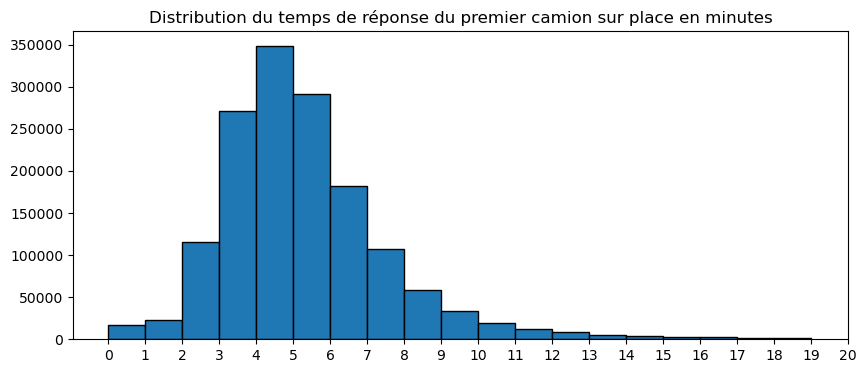

In [44]:
# plot temps de réponse du premier camion
plt.figure(figsize = (10,4))
plt.hist(Incidents_Mob.FirstPumpArriving_AttendanceTime,bins = range(0,1200,60), edgecolor = "black")
plt.xticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title("Distribution du temps de réponse du premier camion sur place en minutes")
plt.show()

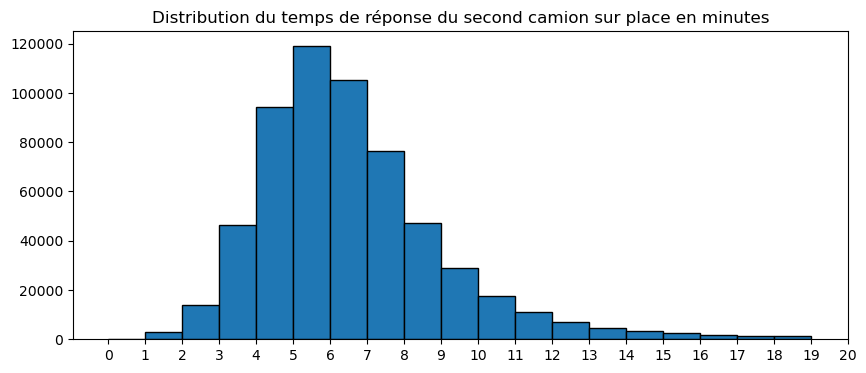

In [132]:
plt.figure(figsize = (10,4))
plt.hist(Incidents_Mob.SecondPumpArriving_AttendanceTime,bins = range(0,1200,60), edgecolor = "black")
plt.xticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title("Distribution du temps de réponse du second camion sur place en minutes")
plt.show()

In [46]:
print("temps de reponse moy premier camion",(Incidents_Mob.FirstPumpArriving_AttendanceTime/60).mean().round(2))
print("temps de reponse moy second camion",(Incidents_Mob.SecondPumpArriving_AttendanceTime/60).mean().round(2))

temps de reponse moy premier camion 5.3
temps de reponse moy second camion 6.58


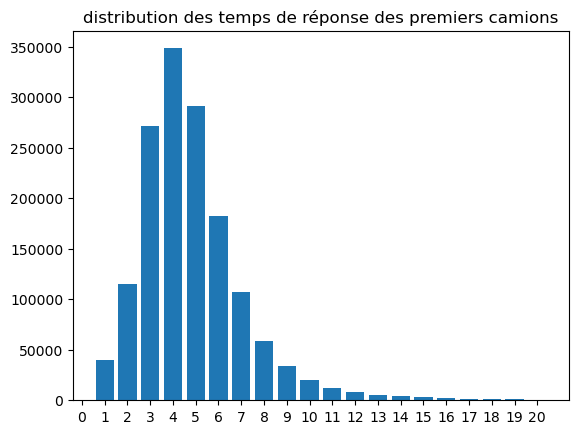

In [134]:
plt.bar(x=(Incidents_Mob.FirstPumpArriving_AttendanceTime//60).value_counts().index,
        height=(Incidents_Mob.FirstPumpArriving_AttendanceTime//60).value_counts(),
        label = "premier camion")
plt.xticks(ticks =range(0,21))
plt.title("distribution des temps de réponse des premiers camions")
plt.show()

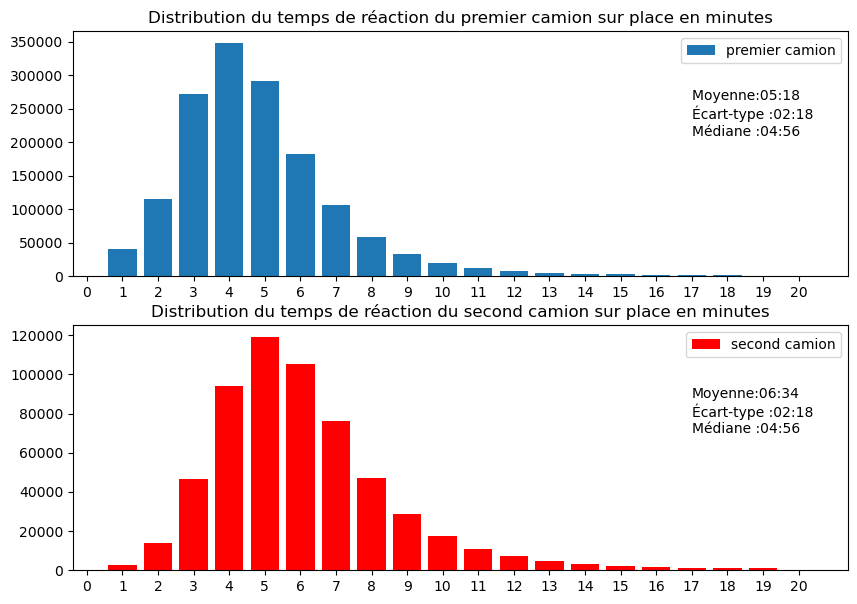

In [135]:
# Barplot du temps d'arrivée en minutes
plt.figure(figsize = (10,7))

plt.subplot(2,1,1)
plt.bar(x=(Incidents_Mob.FirstPumpArriving_AttendanceTime//60).value_counts().index,
        height=(Incidents_Mob.FirstPumpArriving_AttendanceTime//60).value_counts(),
        label = "premier camion")
plt.xticks(ticks =range(0,21))
plt.legend()
plt.title("Distribution du temps de réaction du premier camion sur place en minutes")
plt.annotate(f'Moyenne:{"%02d:%02d" % (divmod(Incidents_Mob.FirstPumpArriving_AttendanceTime.mean(),60))} \nÉcart-type :{"%02d:%02d" % (divmod(Incidents_Mob.FirstPumpArriving_AttendanceTime.std(),60))} \nMédiane :{"%02d:%02d" % (divmod(Incidents_Mob.FirstPumpArriving_AttendanceTime.median(),60))}',xy=(17,210000))


plt.subplot(2,1,2)
plt.bar(x = (Incidents_Mob.SecondPumpArriving_AttendanceTime//60).value_counts().index,
        height = (Incidents_Mob.SecondPumpArriving_AttendanceTime//60).value_counts(),
        color ='red', label = "second camion")
plt.xticks(ticks = range(0,21))
plt.title("Distribution du temps de réaction du second camion sur place en minutes")
plt.annotate(f'Moyenne:{"%02d:%02d" % (divmod(Incidents_Mob.SecondPumpArriving_AttendanceTime.mean(),60))}\nÉcart-type :{"%02d:%02d" % (divmod(Incidents_Mob.FirstPumpArriving_AttendanceTime.std(),60))} \nMédiane :{"%02d:%02d" % (divmod(Incidents_Mob.FirstPumpArriving_AttendanceTime.median(),60))}',xy=(17,70000))

plt.legend()
#plt.savefig("Plot/Distribution temps réponse camions.png")
plt.show()


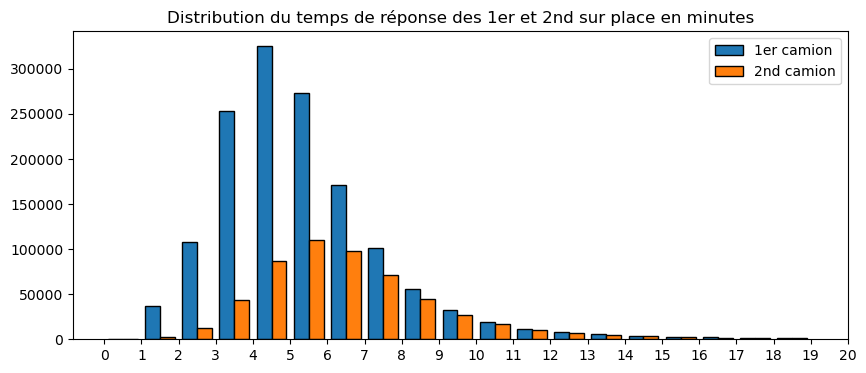

In [90]:
# Histogramme temps d'arrivée
plt.figure(figsize = (10,4))
plt.hist([Incidents_Mob.FirstPumpArriving_AttendanceTime,Incidents_Mob.SecondPumpArriving_AttendanceTime]
         ,bins = range(0,1200,60), edgecolor = "black", label=["1er camion","2nd camion"])
plt.xticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title("Distribution du temps de réponse des 1er et 2nd sur place en minutes")
plt.legend()
plt.show()

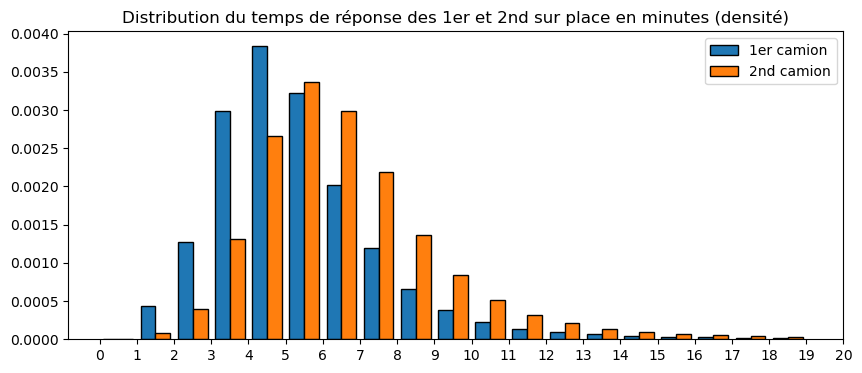

In [91]:
# Hauteur normalisée
plt.figure(figsize = (10,4))
plt.hist([Incidents_Mob.FirstPumpArriving_AttendanceTime,Incidents_Mob.SecondPumpArriving_AttendanceTime]
         ,bins = range(0,1200,60), edgecolor = "black", label=["1er camion","2nd camion"], density = True)
plt.xticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title("Distribution du temps de réponse des 1er et 2nd sur place en minutes (densité)")
plt.legend()
plt.show()



In [96]:
Incidents_Mob.IncGeo_BoroughName.unique()

array(['WANDSWORTH', 'ENFIELD', 'HILLINGDON', 'ISLINGTON', 'CAMDEN',
       'GREENWICH', 'HOUNSLOW', 'SOUTHWARK', 'HACKNEY', 'CITY OF LONDON',
       'BROMLEY', 'MERTON', 'KENSINGTON AND CHELSEA', 'NEWHAM', 'LAMBETH',
       'REDBRIDGE', 'TOWER HAMLETS', 'WALTHAM FOREST', 'LEWISHAM',
       'WESTMINSTER', 'CROYDON', 'RICHMOND UPON THAMES', 'BARNET',
       'BRENT', 'HARINGEY', 'BEXLEY', 'BARKING AND DAGENHAM',
       'HAMMERSMITH AND FULHAM', 'HAVERING', 'EALING',
       'KINGSTON UPON THAMES', 'SUTTON', 'HARROW'], dtype=object)

In [45]:
# Distinction Inner Outer London

Inner_London = ["CAMDEN", "CITY OF LONDON", "HACKNEY", "HAMMERSMITH AND FULHAM", "HARINGEY",
                "ISLINGTON", "KENSINGTON AND CHELSEA",
                "LAMBETH", "LEWISHAM", "NEWHAM", "SOUTHWARK", "TOWER HAMLETS", "WANDSWORTH" ,"WESTMINSTER"]

Outer_London = ["BARKING AND DAGENHAM", "BARNET", "BEXLEY", "BRENT", "BROMLEY", "CROYDON", 
                "EALING", "ENFIELD", "GREENWICH", "HARROW", "HAVERING", "HILLINGDON", "HOUNSLOW", 
                "KINGSTON UPON THAMES","MERTON", "REDBRIDGE", "RICHMOND UPON THAMES", "SUTTON", "WALTHAM FOREST"]

In [46]:
# Ajout de la zone de Londres

London_Zone = []

for i in Incidents_Mob.IncGeo_BoroughName :
    if i in Inner_London:
        London_Zone.append("Inner London")
    elif i in Outer_London : 
        London_Zone.append("Outer London")

In [47]:
Incidents_Mob["London_Zone"] = London_Zone

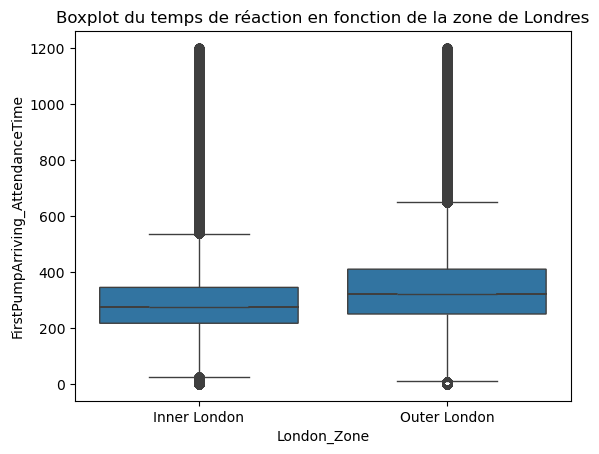

In [48]:
# temps de réponse moyen en fonction de la zone
sns.boxplot(y = Incidents_Mob.FirstPumpArriving_AttendanceTime, x= Incidents_Mob.London_Zone, notch=True)
#plt.yticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title("Boxplot du temps de réaction en fonction de la zone de Londres")
plt.show()


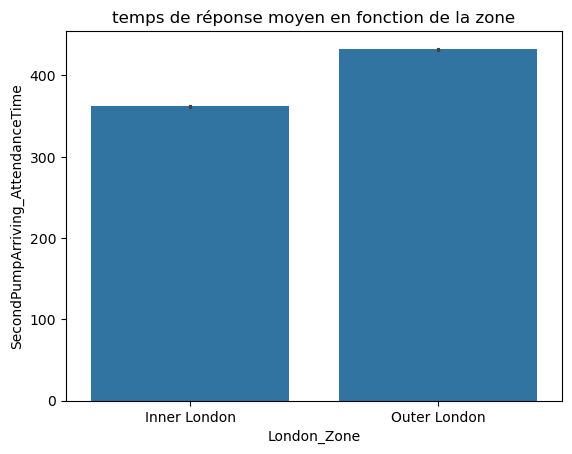

In [49]:
sns.barplot(data =Incidents_Mob, y = Incidents_Mob.SecondPumpArriving_AttendanceTime,x = Incidents_Mob.London_Zone,
             errorbar = 'ci')
#plt.yticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title("temps de réponse moyen en fonction de la zone")
plt.show()

In [63]:
# tab des stat en fonction de la zone
zone = Incidents_Mob.groupby("London_Zone")[["FirstPumpArriving_AttendanceTime","SecondPumpArriving_AttendanceTime"]].agg(["mean","std","median"])

display(zone)                                                                                                 

print(tuple(zone.loc["Inner London","FirstPumpArriving_AttendanceTime"]/60))
print(tuple(zone.loc["Outer London","FirstPumpArriving_AttendanceTime"]/60))


FirstPumpArriving_AttendanceTime                     \
                                         mean         std median   
London_Zone                                                        
Inner London                       293.532872  123.830994  275.0   
Outer London                       344.229032  149.304457  322.0   

             SecondPumpArriving_AttendanceTime                     
                                          mean         std median  
London_Zone                                                        
Inner London                        362.040926  135.311663  339.0  
Outer London                        432.422332  164.547090  408.0

(4.8922145367748024, 2.0638498992166645, 4.583333333333333)
(5.737150526649069, 2.488407609456977, 5.366666666666666)


In [61]:
inner_mean,inner_std,inner_median = tuple(zone.loc["Inner London","FirstPumpArriving_AttendanceTime"]/60) 

outer_mean,outer_std,outer_median = tuple(zone.loc["Outer London","FirstPumpArriving_AttendanceTime"]/60) 

In [57]:
# map pour appliquer fonction sur les valeurs du df
zone["FirstPumpArriving_AttendanceTime"].map(lambda x :divmod(x,60))

,mean,std,median
London_Zone,,,
Inner London,"(4.0, 53.53287220648815)","(2.0, 3.8309939529998616)","(4.0, 35.0)"
Outer London,"(5.0, 44.22903159894412)","(2.0, 29.30445656741861)","(5.0, 22.0)"


In [53]:
# Test. Recup de moyenne , st et median pour les premieres pompes de inner London
print(zone.loc["Inner London","FirstPumpArriving_AttendanceTime"].map(lambda x : "%02d:%02d" % divmod(x,60)))

print(tuple(zone.loc["Inner London","FirstPumpArriving_AttendanceTime"].map(lambda x : "%02d:%02d" % divmod(x,60))))


mean      04:53
std       02:03
median    04:35
Name: Inner London, dtype: object
('04:53', '02:03', '04:35')


In [54]:
inner_mean,inner_std,inner_median = tuple(zone.loc["Inner London","FirstPumpArriving_AttendanceTime"].map(lambda x : "%02d:%02d" % divmod(x,60)))

print(inner_mean,inner_std,inner_median)

04:53 02:03 04:35


In [55]:
# Stat pour outer london
print(zone.loc["Outer London","FirstPumpArriving_AttendanceTime"].map(lambda x : "%02d:%02d" % divmod(x,60)))

outer_mean,outer_std,outer_median = tuple(zone.loc["Outer London","FirstPumpArriving_AttendanceTime"].map(lambda x : "%02d:%02d" % divmod(x,60)))

print(outer_mean,outer_std,outer_median)



mean      05:44
std       02:29
median    05:22
Name: Outer London, dtype: object
05:44 02:29 05:22


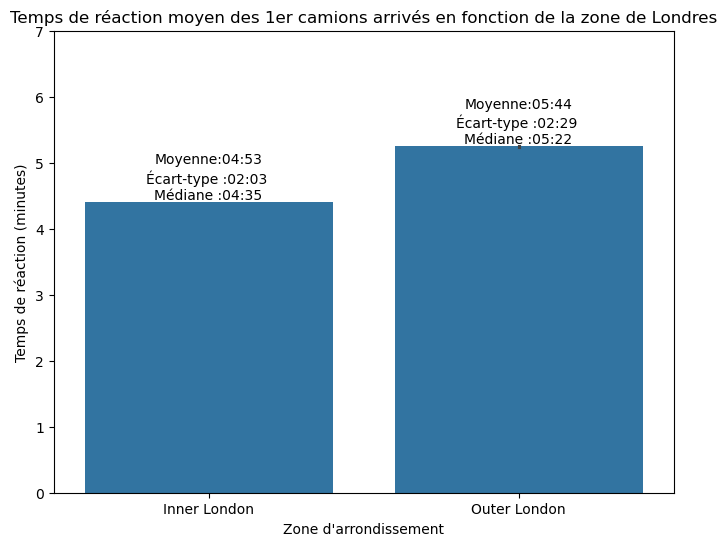

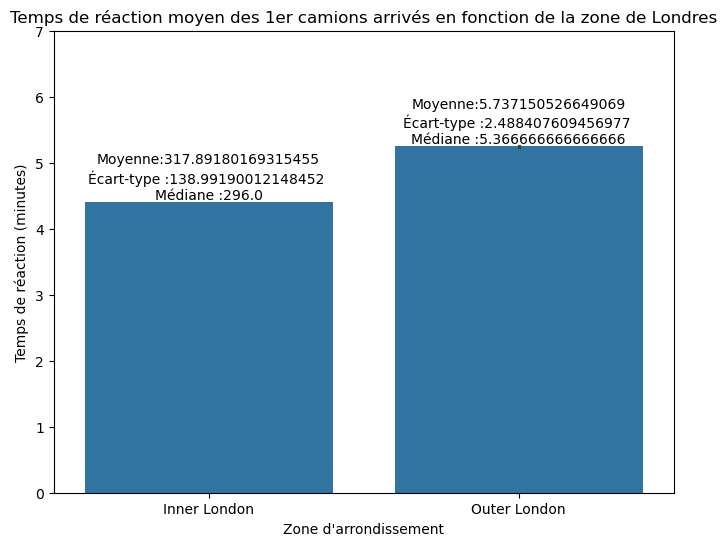

In [ ]:
#fig,ax = plt.figure(figsize = (10,8))
fig,ax = plt.subplots(figsize=(8, 6))
sns.barplot(data =Incidents_Mob, y = Incidents_Mob.FirstPumpArriving_AttendanceTime//60,x = Incidents_Mob.London_Zone,
             errorbar = 'ci')

plt.xlabel("Zone d'arrondissement")
plt.ylabel("Temps de réaction (minutes)")
plt.title("Temps de réaction moyen des 1er camions arrivés en fonction de la zone de Londres")

#plt.annotate(f'Moyenne:{inner_mean}\nÉcart-type :{inner_std} \nMédiane :{inner_median}' ,xy=(0.003,5.8))
#plt.annotate(f'Moyenne:{outer_mean}\nÉcart-type :{outer_std} \nMédiane :{outer_median}', xy =(0.8,5.8))

ax.bar_label(ax.containers[0],labels = [f'Moyenne:{inner_mean}\nÉcart-type :{inner_std} \nMédiane :{inner_median}', f'Moyenne:{outer_mean}\nÉcart-type :{outer_std} \nMédiane :{outer_median}'] ,fmt='Mean:')

plt.ylim(0,7)
plt.savefig("Plot/Temps reponse 1er camion fonction de zone de London.png")

plt.show()

# Les brigades intervenant en inner London semble en moyenne plus rapides que celle intervenant en outer London


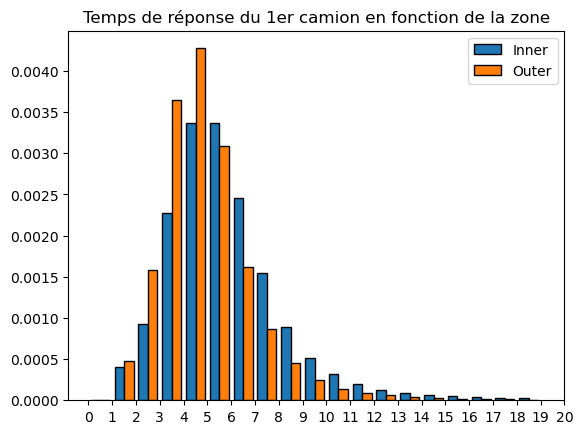

In [112]:
# Histogramme de perf 1er camion en fonction de la zone
plt.hist([Incidents_Mob.query("London_Zone == 'Outer London'").FirstPumpArriving_AttendanceTime,Incidents_Mob.query("London_Zone == 'Inner London'").FirstPumpArriving_AttendanceTime]
         ,bins = range(0,1200,60), edgecolor = "black", label=["Inner","Outer"], density = True)
plt.xticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title("Temps de réponse du 1er camion en fonction de la zone")
plt.annotate(f'Moyenne:{inner_mean}\nÉcart-type :{inner_std} \nMédiane :{inner_median} /Moyenne:{outer_mean}\nÉcart-type :{outer_std} \nMédiane :{outer_median}'
             ,xy=(18,80000))

plt.legend()
plt.show()

In [113]:
Incidents_Mob.groupby("London_Zone")["FirstPumpArriving_AttendanceTime"].agg(['mean',"var"])
# Les temps d'intervention en zone outter sont plus long que en inner et moins variable

,mean,var
London_Zone,,
Inner London,294.852784,15314.321465
Outer London,346.161735,22250.767366


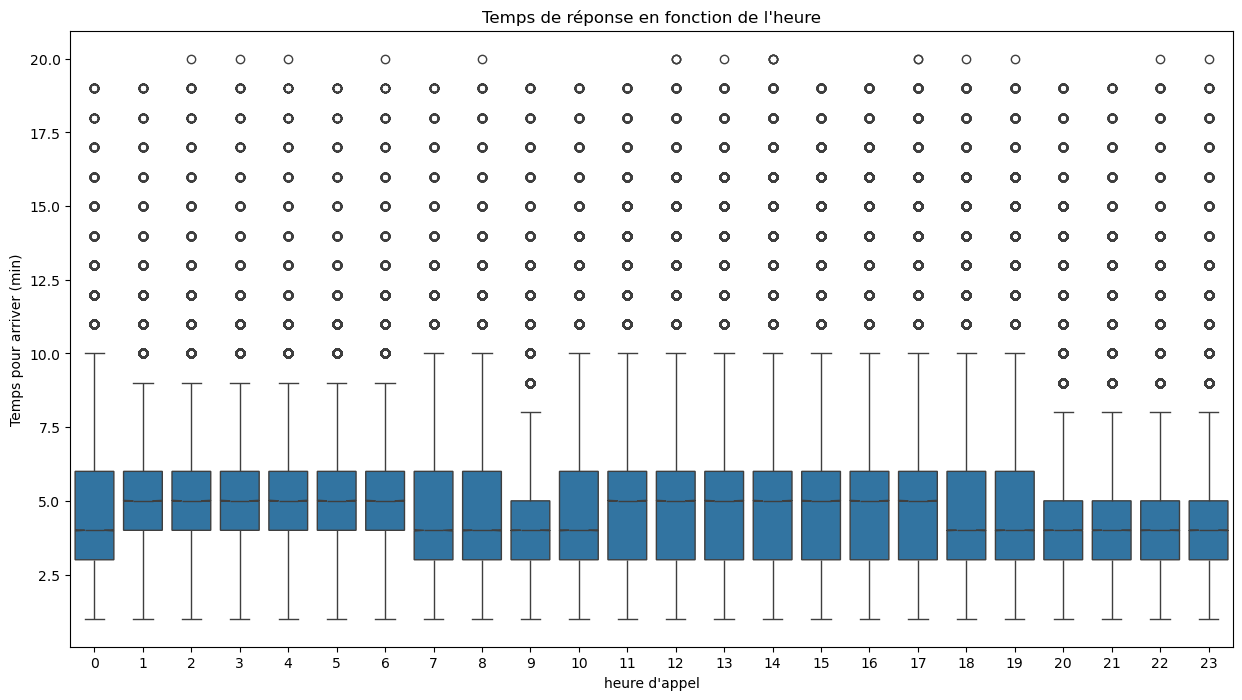

In [114]:
# Box du temps de réponse en focntion de l'heure de l'appel
plt.figure(figsize =(15,8))
sns.boxplot(y = Incidents_Mob.FirstPumpArriving_AttendanceTime//60 , x = "HourOfCall",
            data = Incidents_Mob,notch=True)

plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (min)")
plt.title("Temps de réponse en fonction de l'heure")
plt.show()
# Rush Hours : Matin : 7-10  Aprem : 17-19

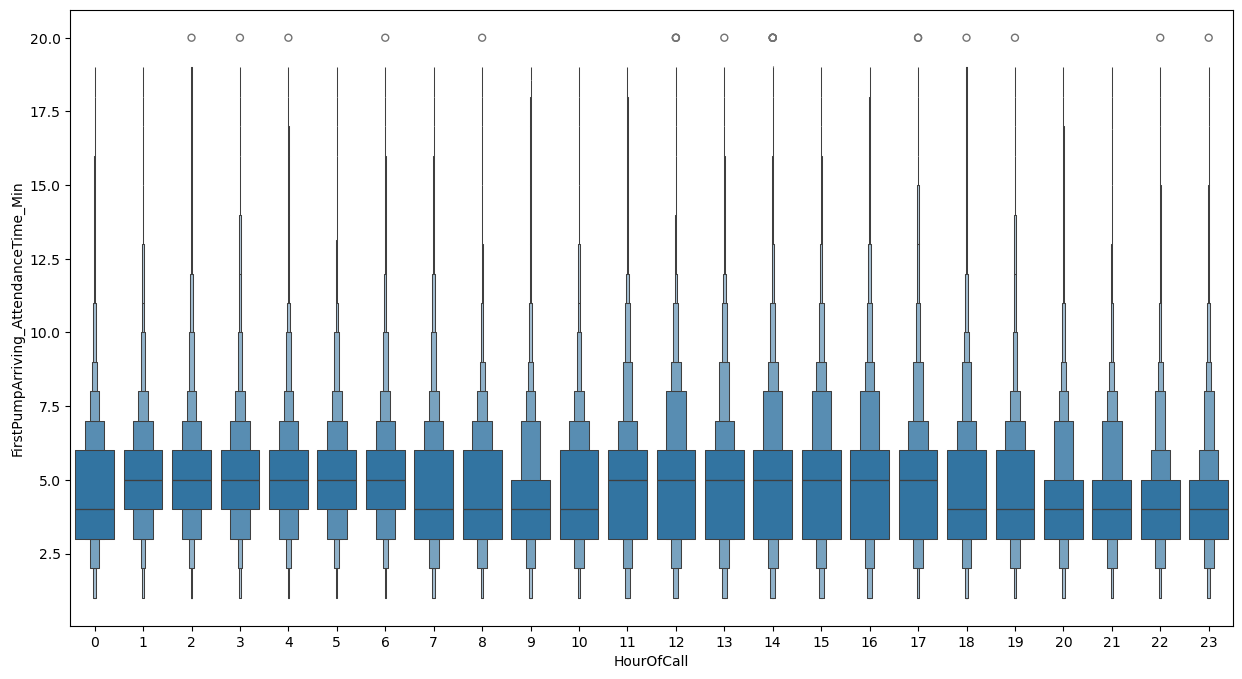

In [200]:
# temps de réaction en fonction de l'heure
plt.figure(figsize =(15,8))

sns.boxenplot(y = Incidents_Mob.FirstPumpArriving_AttendanceTime//60 , x = "HourOfCall",
            data = Incidents_Mob)

#plt.savefig("Plot/Temps reponse 1er camion fonction de l'heure.png")
plt.show()
# Rush Hours : Matin : 7-10  Aprem : 17-19

AttributeError: module 'matplotlib.pyplot' has no attribute 'tile'

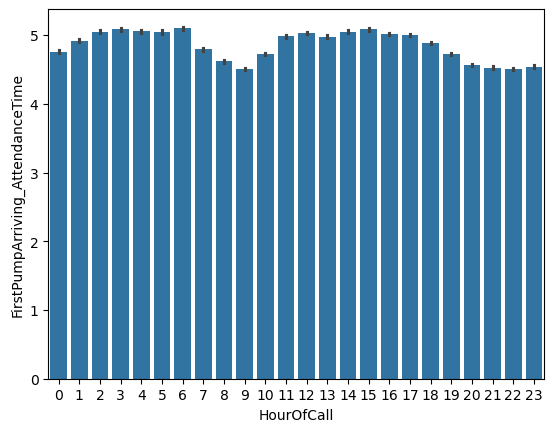

In [116]:
sns.barplot(y = Incidents_Mob.FirstPumpArriving_AttendanceTime//60 , x = "HourOfCall",
            data = Incidents_Mob)
plt.title("temps de réaction moyen en fonction de l'heure")

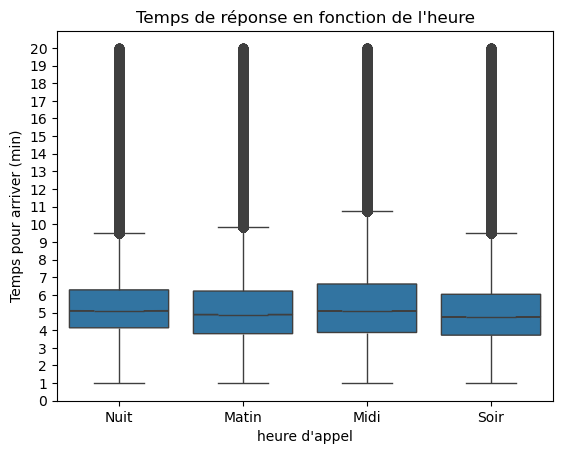

In [152]:
# boxplot du temps de réaction en fonction de la période

sns.boxplot(y = Incidents_Mob["FirstPumpArriving_AttendanceTime"] , x= "Periode",data = Incidents_Mob, notch=True)

plt.yticks(ticks = range(0,1260,60),labels= range(0,21))
plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (min)")
plt.title("Temps de réponse en fonction de l'heure")
plt.show()

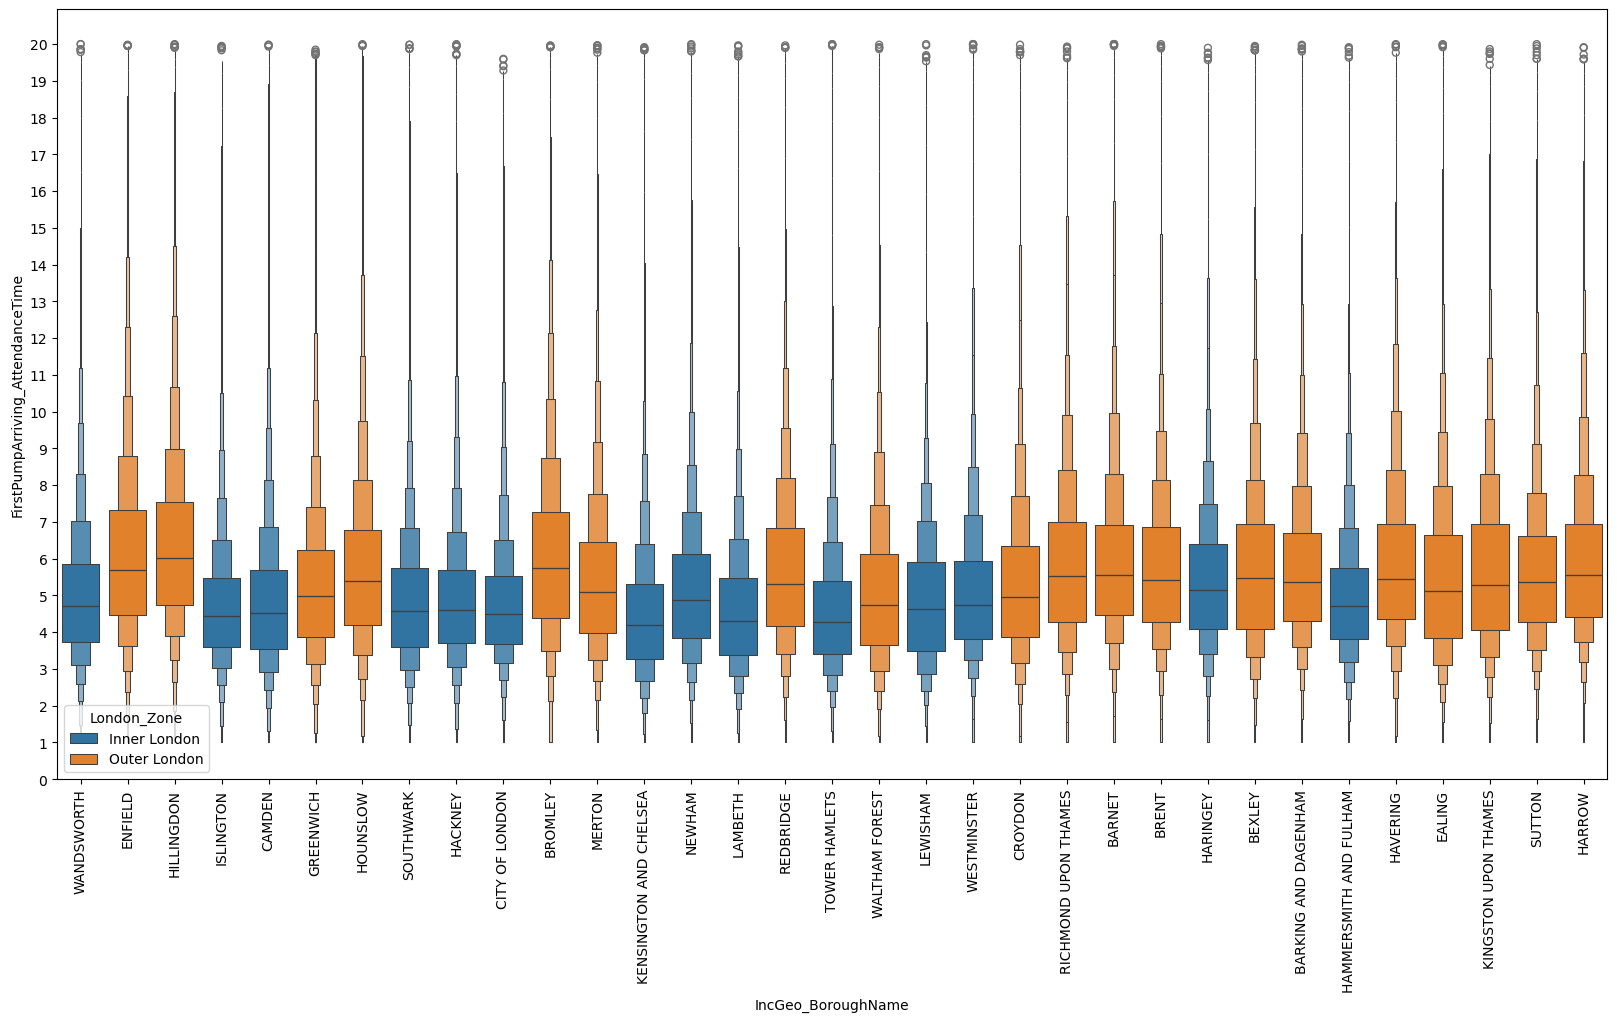

In [153]:
# Temps de réponse 1er camion en fonction du quartier
plt.figure(figsize = (20,10))
sns.boxenplot(y = Incidents_Mob["FirstPumpArriving_AttendanceTime"] , x= "IncGeo_BoroughName"
              ,data = Incidents_Mob, hue = "London_Zone")
plt.xticks(rotation=90)
plt.yticks(ticks = range(0,1260,60),labels= range(0,21))
plt.show()

# Inner London : a peu pres les memes temps pour tous. 1 quartier qui se démarque avec un médiane un peu plus élevée
# Les variances plus ou moins similaires sauf pour un ou la dispersion est plus importante
# Outter London : Plus de quartiers qui ont des médianes et dispersions différentes.


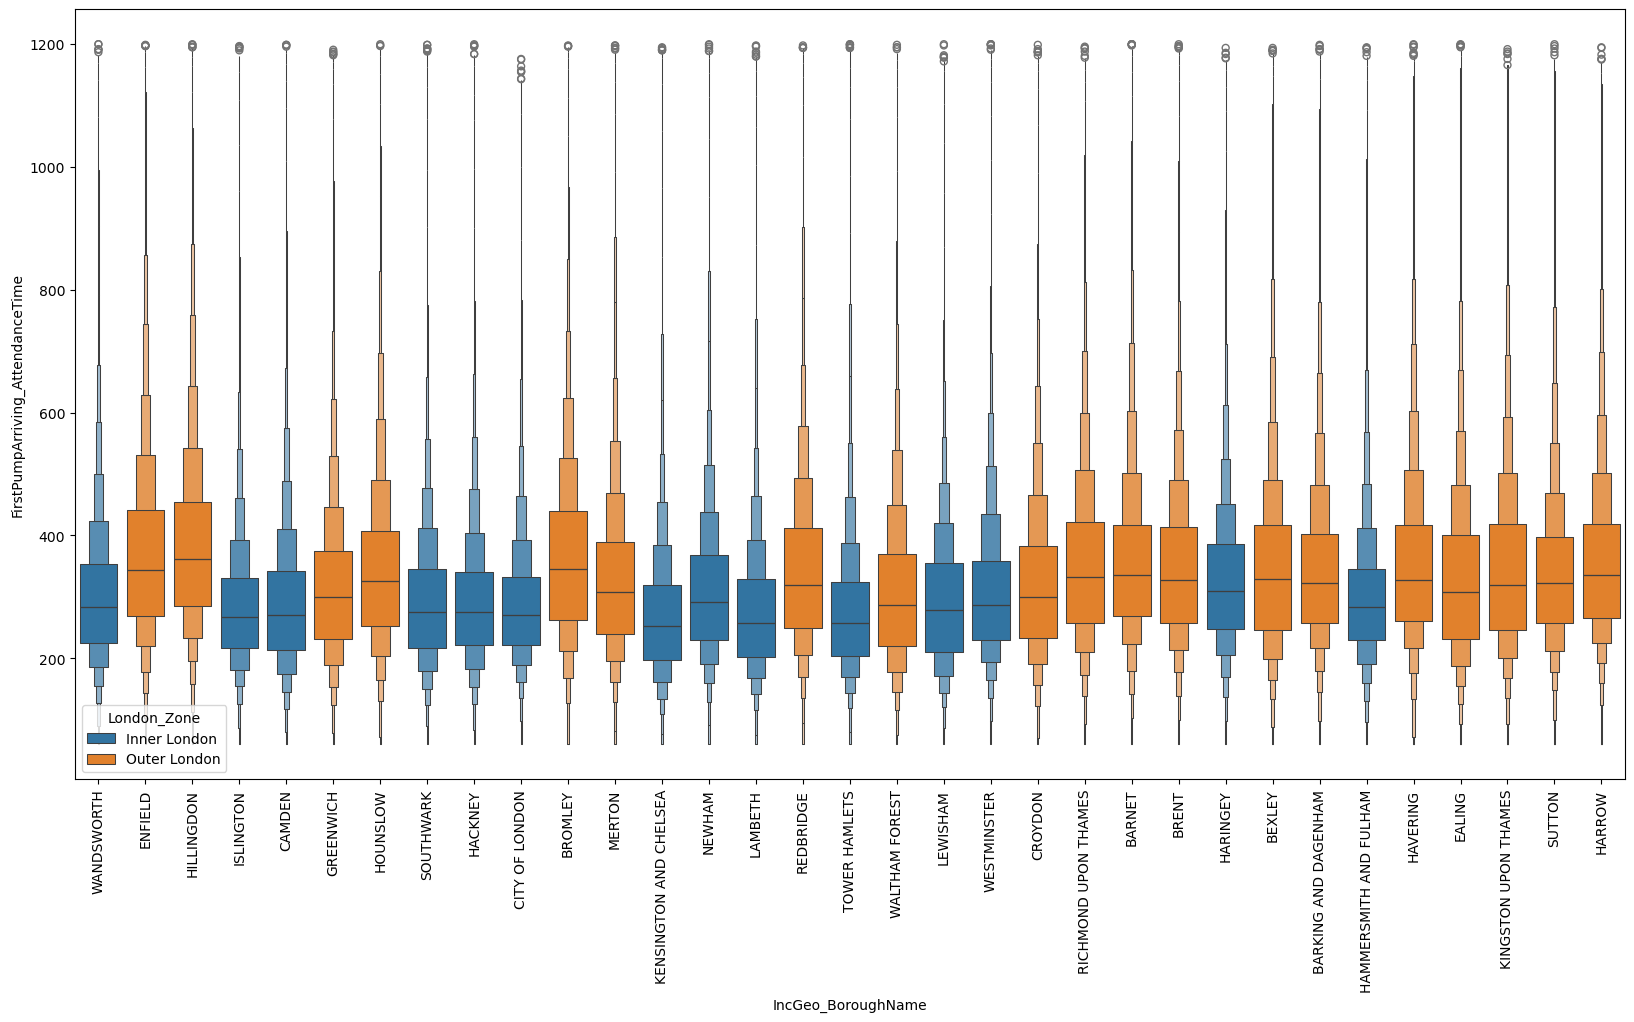

In [118]:
# Temps de réponse 1er camion en fonction du quartier
plt.figure(figsize = (20,10))
sns.boxenplot(y = Incidents_Mob.FirstPumpArriving_AttendanceTime , x= "IncGeo_BoroughName"
              ,data = Incidents_Mob, hue = "London_Zone")
plt.xticks(rotation=90)
plt.show()
# Inner London : a peu pres les memes temps pour tous. 1 quartier qui se démarque avec un médiane un peu plus élevée
# Les variances plus ou moins similaires sauf pour un ou la dispersion est plus importante
# Outter London : Plus de quartiers qui ont des médianes et dispersions différentes.


In [208]:
# check de corrélation entre varibles qt
Variable_qt =["HourOfCall","FirstPumpArriving_AttendanceTime","SecondPumpArriving_AttendanceTime",
              "NumStationsWithPumpsAttending","NumPumpsAttending","PumpCount","PumpMinutesRounded",
              "Notional Cost (£)"]

cor = Incidents_Mob[Variable_qt].corr()

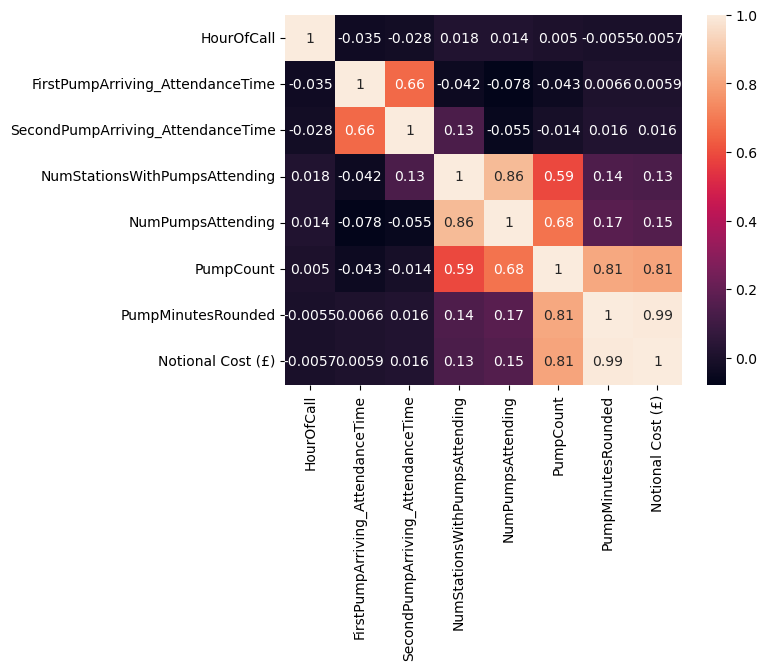

In [209]:
# corrélation entre les variables quantitatives
sns.heatmap(cor, annot=True);
# Nombre de pompes corrélé à temps d'action des pompes(0.81),cout supposée (0.81), nb de pompes participant


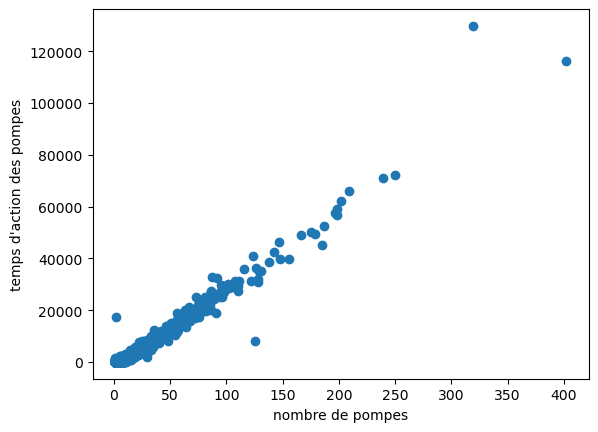

In [210]:
plt.scatter(x = Incidents_new.PumpCount, y= Incidents_new.PumpMinutesRounded)
plt.xlabel("nombre de pompes")
plt.ylabel("temps d'action des pompes");